<a href="https://colab.research.google.com/github/yangsoyoung10011001/machinelearning/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bank.csv")

def encoder(df):
    from sklearn.preprocessing import LabelEncoder

    cate = list(df.select_dtypes(include=['object']).columns)
    label_feat = {}
    for i, feature in enumerate(cate):
        label_feat[feature] = LabelEncoder()
        df[feature] = label_feat[feature].fit_transform(df[feature])

    return df

test_encoded_df = encoder(df)


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
#check for null and unknown value in columns
print("<Null value in dataframe>")
print(df.isnull().sum())
print("\n<Unknown values in dataframe>")
for c in df.columns:
  print("Unknown value in ", c, ": ", len(df[df[c] == 'unknown'].index.tolist()))

<Null value in dataframe>
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<Unknown values in dataframe>
Unknown value in  age :  0
Unknown value in  job :  0
Unknown value in  marital :  0
Unknown value in  education :  0
Unknown value in  default :  0
Unknown value in  balance :  0
Unknown value in  housing :  0
Unknown value in  loan :  0
Unknown value in  contact :  0
Unknown value in  day :  0
Unknown value in  month :  0
Unknown value in  duration :  0
Unknown value in  campaign :  0
Unknown value in  pdays :  0
Unknown value in  previous :  0
Unknown value in  poutcome :  0
Unknown value in  deposit :  0


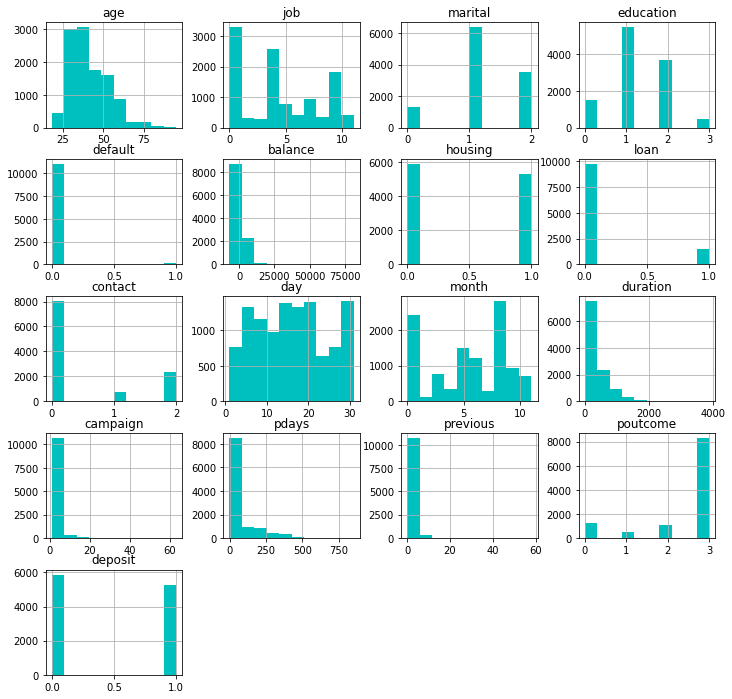

In [ ]:
distribution = test_encoded_df.hist(linewidth=1, color='c')
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


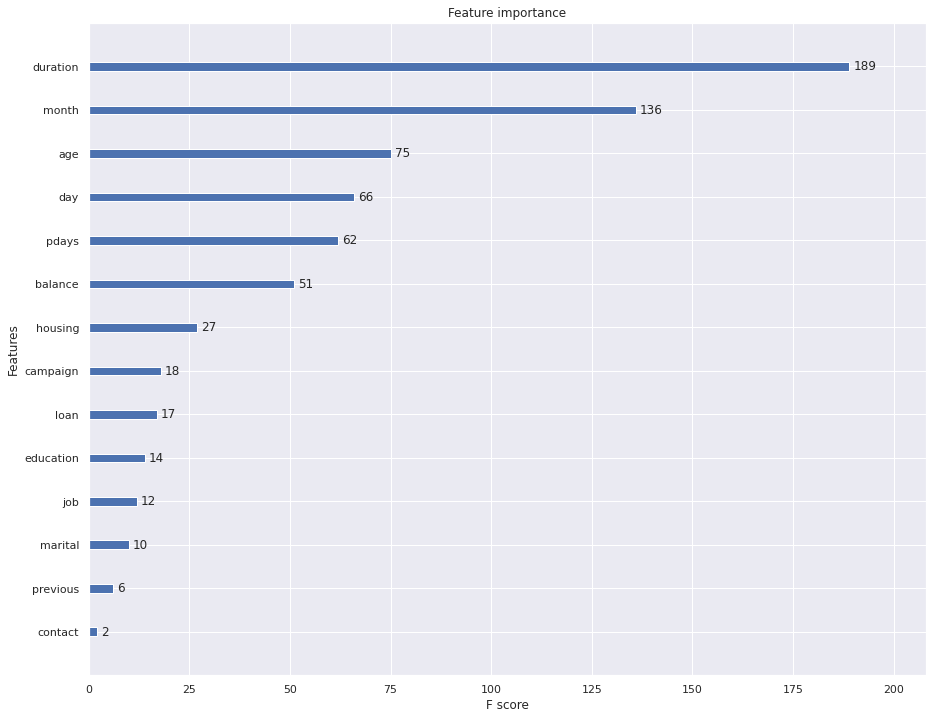

In [ ]:
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bank.csv")

def encoder(df):
    from sklearn.preprocessing import LabelEncoder

    cate = list(df.select_dtypes(include=['object']).columns)
    label_feat = {}
    for i, feature in enumerate(cate):
        label_feat[feature] = LabelEncoder()
        df[feature] = label_feat[feature].fit_transform(df[feature])

    return df


df = df[df['job'] != 'unknown']
df = df[df['contact'] != 'unknown']
df = df[df['education'] != 'unknown']

df.drop('default', axis=1, inplace=True)
df.drop('poutcome', axis=1, inplace=True)

df = encoder(df)

x = df.drop(['deposit'], axis=1)
y = df['deposit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=10)

from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model_importance = model.fit(x_train, y_train)

plt.rcParams['figure.figsize'] = [15, 12]
sns.set(style = 'darkgrid')
print(plot_importance(model_importance))


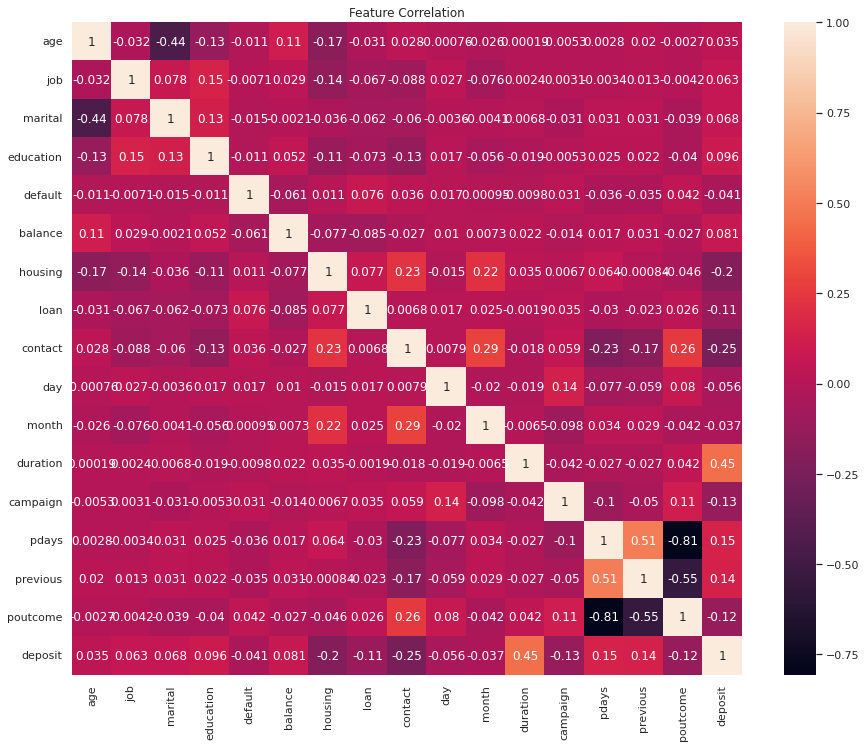

In [ ]:
plt.rcParams['figure.figsize'] = [15, 12]
sns.heatmap(test_encoded_df.corr(), annot = True, color='Black')
plt.title('Feature Correlation')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, plot_confusion_matrix


fpr = [0, 0, 0]
tpr = [0, 0, 0]
roc_auc = [0, 0, 0]
index = 0

classification_models = ['dtree', 'nb', 'svm']
decisionParam = {'max_depth':[3, 4, 5, 6, 7, 8], 'min_sample_leaf':[1, 2, 3, 4, 5],
                'min_samples_split':[2, 3, 4, 5, 6, 7]}
gaussianParam = {'var_smoothing':[1e-12, 1e-11, 1e-10, 1e-9, 1e-8]}
SVCParam =  {'C':[0.01, 0.1, 1, 10], 'gamma':[0.01, 0.1, 1, 10]}

Model = ['DecisionTree', 'GaussianNB', 'Support Vector machine']
bestScore = [0, 0, 0]
bestParams = ["d", "g", "s"]
c_matrix = [0, 0, 0]


def classification(x, y, model):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import f1_score,classification_report,confusion_matrix

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=10)
    
    if model == 'dtree':
      currentBest = 0.0
      for md in decisionParam['max_depth']:
        for msl in decisionParam['min_sample_leaf']:
          for mss in decisionParam['min_samples_split']:
            tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, min_samples_split=mss, random_state=12)
            tree.fit(x_train, y_train)
            tree_preds = tree.predict(x_test)
            tree_prob = tree.predict_proba(x_test)
            prob = tree_prob[:, 1]

            score = f1_score(y_test, tree_preds, pos_label='yes')
            if(score > currentBest):
              currentBest = score
              bestScore[0] = score
              bestParams[0] = 'max_depth:'+str(md)+' min_sample_leaf:'+str(msl)+' min_samples_split:'+str(mss)
              c_matrix[0] = confusion_matrix(y_test, tree_preds)
              #parameters in roc curve
              global index
              le =  LabelEncoder()
              yt = le.fit_transform(y_test)
              fpr[index], tpr[index], _ = roc_curve(yt, prob)
              #confusion matrix visualization
              plot_confusion_matrix(tree, x_test, y_test)
              plt.title("D tree")
              plt.savefig('tree_model.png')
              plt.show()

    elif model == 'nb':
      currentBest = 0.0
      for vs in gaussianParam['var_smoothing']:
        nb = GaussianNB(var_smoothing=vs)
        nb.fit(x_train, y_train)
        nb_preds = nb.predict(x_test)
        nb_prob = nb.predict_proba(x_test)
        prob = nb_prob[:, 1]

        score = f1_score(y_test, nb_preds, pos_label='yes')
        if(score > currentBest):
          currentBest = score
          bestScore[1] = score
          bestParams[1] = 'var_smoothing:'+str(vs)
          c_matrix[1] = confusion_matrix(y_test, nb_preds)
          #parameters in roc curve
          index = 1
          le =  LabelEncoder()
          yt = le.fit_transform(y_test)
          fpr[index], tpr[index], _ = roc_curve(yt, prob)
          #confusion matrix visualization
          plot_confusion_matrix(nb, x_test, y_test)
          plt.title("Naive Bayes")
          plt.savefig('nb_model.png')
          plt.show()

    elif model == 'svm':
      currentBest = 0.0
      for c in SVCParam['C']:
        for g in SVCParam['gamma']:
          svm = SVC(C=c, gamma=g, probability=True)
          svm.fit(x_train, y_train)
          svm_preds = svm.predict(x_test)
          svm_prob = svm.predict_proba(x_test)
          prob = svm_prob[:, 1]

          score = f1_score(y_test, svm_preds, pos_label='yes')
          if(score > currentBest):
            currentBest = score
            bestScore[2] = score
            bestParams[2] = 'C:'+str(c)+' gamma:'+str(g)
            c_matrix[2] = confusion_matrix(y_test, svm_preds)
            #parameters in roc curve
            index = 2
            le =  LabelEncoder()
            yt = le.fit_transform(y_test)
            fpr[index], tpr[index], _ = roc_curve(yt, prob)
            #confusion matrix visualization
            plot_confusion_matrix(svm, x_test, y_test)
            plt.title("Support vector machine")
            plt.savefig('svm_model.png')
            plt.show()
    else:
        print('Invalid classification model name...')
    

# function label encoding
# input target column list and dataframe
def lblEncoding(listObj, x):
    lbl = preprocessing.LabelEncoder()

    for i in range(len(listObj)):
        x[listObj[i]] = lbl.fit_transform(x[listObj[i]])
    # output encoded dataframe
    return x

# function ordinal encoding
# input target column list and dataframe
def ordEncoding(listObj, x):
    ord=preprocessing.OrdinalEncoder()

    for i in range(len(listObj)):
        tempColumn=x[listObj[i]].to_numpy().reshape(-1, 1)
        tempColumn=ord.fit_transform(tempColumn)
        tempColumn=tempColumn.reshape(1, -1)[0]
        x[listObj[i]].replace(x[listObj[i]].tolist(), tempColumn, inplace=True)
    # output encoded dataframe
    return x

# function ohehot encoding
# input dataframe
def ohEncoding(x):
    # output encoded dataframe
    return pd.get_dummies(x)


def find_best(df):
    x = df.drop(['deposit'], axis=1)
    y = df['deposit']
    listObj=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month']
    scalerTemp = [preprocessing.RobustScaler(), preprocessing.MaxAbsScaler(), preprocessing.StandardScaler()]

    for i in range(0, len(classification_models)):
      if(listEncoder[i] == 'LabelEncoder'):
        encoded_df = lblEncoding(listObj, x)
      else:
        encoded_df = ohEncoding(x)

      scaler = scalerTemp[i]
      X = scaler.fit_transform(encoded_df)
      classification(X, y, classification_models[i])

    #print results
    for i in range(0, len(Model)):
      print("\n<Best score and params in ", Model[i], ">")
      print("Confusion Matrix:\n", c_matrix[i])
      print("F1 score:", bestScore[i])
      print("Best params:", bestParams[i])
    





df = pd.read_csv("bank.csv")

df = df[df['job'] != 'unknown']
df = df[df['contact'] != 'unknown']
df = df[df['education'] != 'unknown']

df.drop('default', axis=1, inplace=True)
df.drop('poutcome', axis=1, inplace=True)

# user can select classifier, encoder and scaler to make combination
listClassifier=[DecisionTreeClassifier(), GaussianNB(), SVC()]
listEncoder=['LabelEncoder', 'OneHotEncoder', 'OneHotEncoder']
listScaler=['RobustScaler', 'MaxAbsScaler', 'StandardScaler']


find_best(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: C


<Best score and params in  DecisionTree >
Confusion Matrix:
 [[ 887  272]
 [ 241 1118]]
F1 score: 0.8133866860676608
Best params: max_depth:7 min_sample_leaf:1 min_samples_split:4

<Best score and params in  GaussianNB >
Confusion Matrix:
 [[ 822  337]
 [ 349 1010]]
F1 score: 0.7464892830746489
Best params: var_smoothing:1e-12

<Best score and params in  Support Vector machine >
Confusion Matrix:
 [[ 858  301]
 [ 228 1131]]
F1 score: 0.810462199928341
Best params: C:1 gamma:0.1


In [ ]:
import graphviz
with open("tree.dot") as f:
      dot_graph = f.read()
graphviz.Source(dot_graph).render('tree', format='png')

'tree.png'

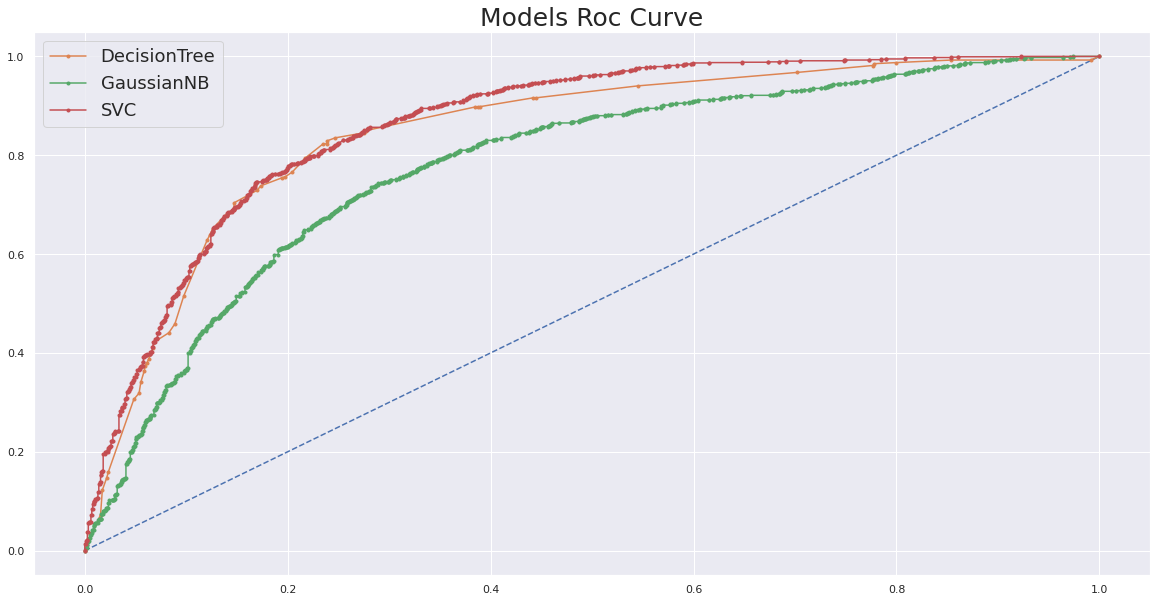

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr[0], tpr[0], marker='.', label = 'DecisionTree')
plt.plot(fpr[1], tpr[1], marker='.', label = 'GaussianNB')
plt.plot(fpr[2], tpr[2], marker='.', label = 'SVC')
plt.legend(fontsize = 18)
plt.title("Models Roc Curve", fontsize = 25)
plt.show()
